In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
prices = pd.read_csv("all_stocks_5yr.csv")

In [114]:
def findSignals(prices, k=10):
    n = len(prices)

    dp = [[0] * n for _ in range(k + 1)]
    buys = []
    sells = []
    for i in range(1, k + 1):
        max_diff = -prices[0]
        buy_idx = [0] * n
        sell_idx = [0] * n
        for j in range(1, n):
            dp[i][j] = max(dp[i][j - 1], max_diff + prices[j])
            sell_idx[j] = j if dp[i][j] == max_diff + prices[j] else sell_idx[j-1]
            max_diff = max(max_diff, dp[i - 1][j] - prices[j]) # point to which day's sell
            buy_idx[j] = j if max_diff == dp[i - 1][j] - prices[j] else buy_idx[j-1]
        buys.append(buy_idx)
        sells.append(sell_idx)
                
    i = k-1
    j = n - 1

    buy_signals =  []
    sell_signals = []
    while i >= 0 and j >= 0:
        sell_idx = sells[i][j]
        sell_signals.append(sell_idx)
        buy_idx = buys[i][sell_idx-1]
        buy_signals.append(buy_idx)
        i -= 1
        j = buy_idx - 1
    return buy_signals[::-1], sell_signals[::-1]

def plot_signal(axs, date, price, color, offset, lw=1, arrowstyle="-|>"):
    axs.annotate("", 
                xy=(date, price), 
                xytext=(date, price + offset), 
                horizontalalignment="center", 
                arrowprops=dict(color=color, lw=1, arrowstyle=arrowstyle)) 

def plot_day_chart(n_trans, figsize, ts, date_label="date", price_label="close"):
    buy_signals, sell_signals = findSignals(ts[price_label], n_trans)

    fig, axs = plt.subplots(figsize=figsize)

    ts.iloc[buy_signals].apply(lambda row: plot_signal(axs, row.date, row.close, "red", -1.5), axis=1)
    ts.iloc[sell_signals].apply(lambda row: plot_signal(axs, row.date, row.close, "green", 1.5), axis=1)
    axs.plot(ts[date_label], ts[price_label])

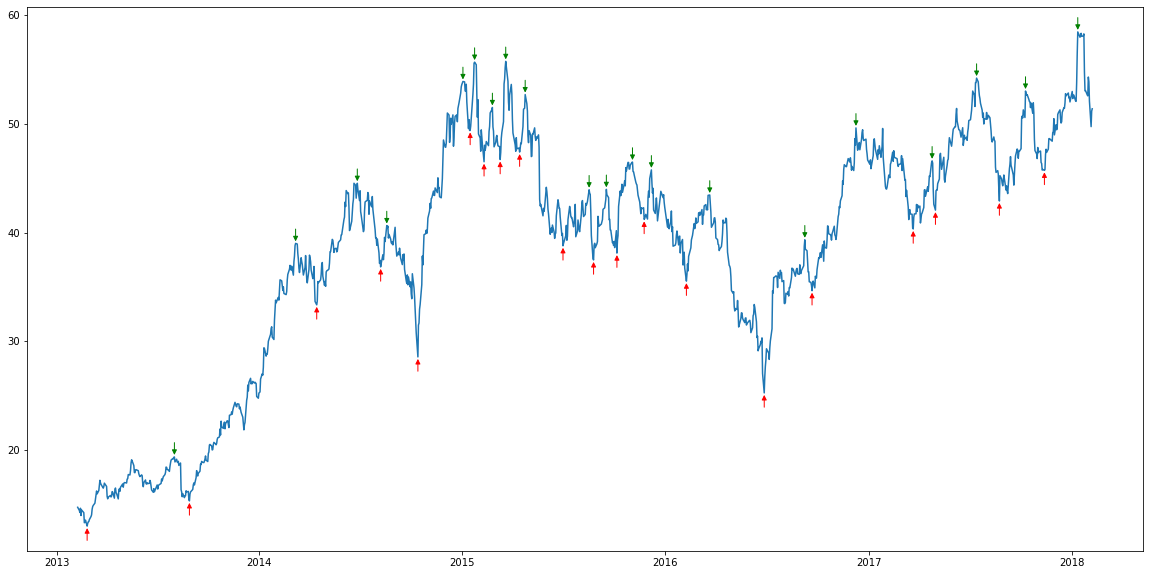

In [115]:
oneStockPrice = prices[prices.Name == "AAL"][["date", "close"]]
oneStockPrice.date = pd.to_datetime(oneStockPrice.date)

N_TRANS = 20
FIGSIZE = (20, 10)
plot_day_chart(N_TRANS, FIGSIZE, oneStockPrice)